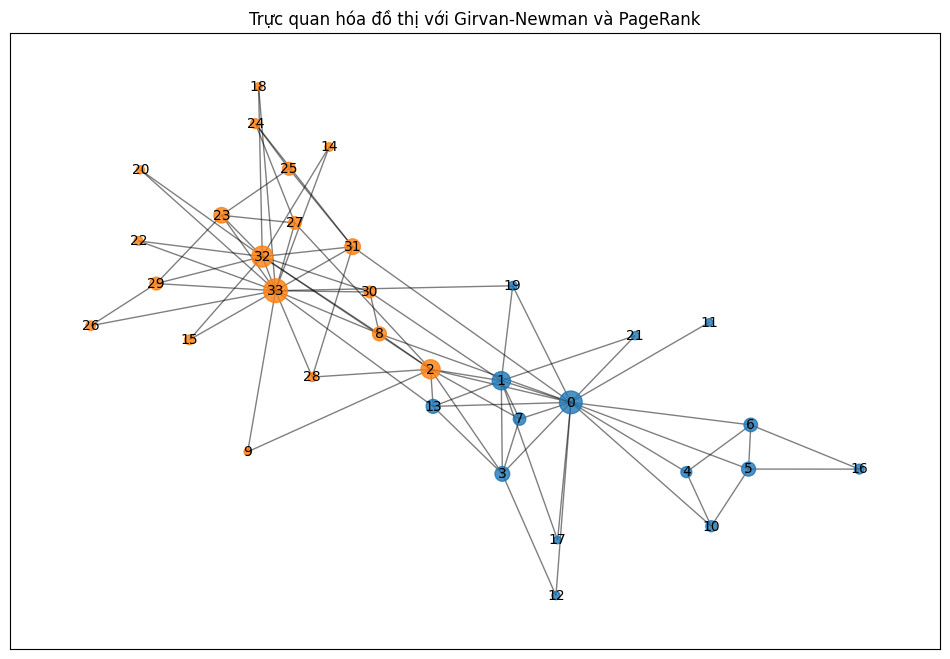

Giá trị PageRank:
Nút 0: PageRank score = 0.0885
Nút 1: PageRank score = 0.0574
Nút 2: PageRank score = 0.0628
Nút 3: PageRank score = 0.0372
Nút 4: PageRank score = 0.0205
Nút 5: PageRank score = 0.0338
Nút 6: PageRank score = 0.0315
Nút 7: PageRank score = 0.0265
Nút 8: PageRank score = 0.0334
Nút 9: PageRank score = 0.0095
Nút 10: PageRank score = 0.0207
Nút 11: PageRank score = 0.0098
Nút 12: PageRank score = 0.0115
Nút 13: PageRank score = 0.0335
Nút 14: PageRank score = 0.0129
Nút 15: PageRank score = 0.0164
Nút 16: PageRank score = 0.0168
Nút 17: PageRank score = 0.0097
Nút 18: PageRank score = 0.0095
Nút 19: PageRank score = 0.0131
Nút 20: PageRank score = 0.0112
Nút 21: PageRank score = 0.0114
Nút 22: PageRank score = 0.0130
Nút 23: PageRank score = 0.0411
Nút 24: PageRank score = 0.0166
Nút 25: PageRank score = 0.0287
Nút 26: PageRank score = 0.0152
Nút 27: PageRank score = 0.0272
Nút 28: PageRank score = 0.0145
Nút 29: PageRank score = 0.0283
Nút 30: PageRank score = 0.0230


In [2]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from networkx.algorithms.community import girvan_newman

# 1. Tạo đồ thị mẫu
G = nx.karate_club_graph()

# 2. Tính toán PageRank
pagerank_scores = nx.pagerank(G)

# 3. Phát hiện cộng đồng sử dụng thuật toán Girvan-Newman
communities_generator = girvan_newman(G)
communities = next(communities_generator)

# 4. Gán màu cho các cộng đồng
community_colors = list(mcolors.TABLEAU_COLORS.values())
color_map = {}
for i, community in enumerate(communities):
    for node in community:
        color_map[node] = community_colors[i % len(community_colors)]

# 5. Trực quan hóa đồ thị, PageRank và các cộng đồng
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G)

# Vẽ các nút với màu sắc theo cộng đồng
nx.draw_networkx_nodes(G, pos, node_size=[v * 3000 for v in pagerank_scores.values()],
                       node_color=[color_map[node] for node in G.nodes()], alpha=0.8)
# Vẽ các cạnh
nx.draw_networkx_edges(G, pos, alpha=0.5)
# Vẽ nhãn cho các nút
nx.draw_networkx_labels(G, pos, font_size=10)

plt.title("Trực quan hóa đồ thị với Girvan-Newman và PageRank")
plt.show()

# 6. In giá trị PageRank
print("Giá trị PageRank:")
for node, score in pagerank_scores.items():
    print(f"Nút {node}: PageRank score = {score:.4f}")



**VÍ DỤ VỀ MẠNG GIAO THÔNG **

Betweenness Centrality:
Nút A: 0.00
Nút B: 0.15
Nút C: 0.30
Nút D: 0.10
Nút E: 0.45
Nút F: 0.00


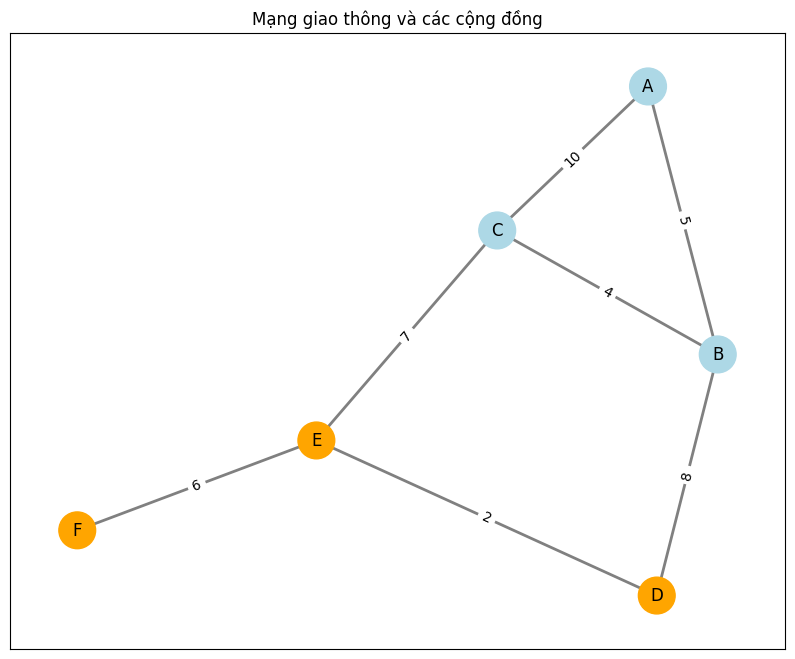

In [1]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

# 1. Xây dựng mạng giao thông mẫu
traffic_network = nx.Graph()

# Thêm các nút (giao lộ)
nodes = ["A", "B", "C", "D", "E", "F"]
traffic_network.add_nodes_from(nodes)

# Thêm các cạnh (con đường) với trọng số (khoảng cách)
edges = [("A", "B", 5), ("A", "C", 10), ("B", "C", 4),
         ("B", "D", 8), ("C", "E", 7), ("D", "E", 2), ("E", "F", 6)]
traffic_network.add_weighted_edges_from(edges)

# 2. Tính toán giá trị quan trọng của các nút (Centrality)
centrality = nx.betweenness_centrality(traffic_network)
print("Betweenness Centrality:")
for node, value in centrality.items():
    print(f"Nút {node}: {value:.2f}")

# 3. Phát hiện cộng đồng (Community Detection)
from networkx.algorithms.community import girvan_newman
communities = next(girvan_newman(traffic_network))

# 4. Trực quan hóa mạng giao thông
plt.figure(figsize=(10, 8))
pos = nx.spring_layout(traffic_network)

# Gán màu cho các cộng đồng
community_colors = ["lightblue", "orange", "green", "purple"]
color_map = {node: community_colors[i] for i, community in enumerate(communities) for node in community}

# Vẽ đồ thị
nx.draw_networkx_nodes(traffic_network, pos, node_color=[color_map[node] for node in traffic_network.nodes()],
                       node_size=700)
nx.draw_networkx_edges(traffic_network, pos, width=2, edge_color="gray")
nx.draw_networkx_labels(traffic_network, pos, font_size=12, font_color="black")

# Hiển thị trọng số cạnh (khoảng cách)
edge_labels = nx.get_edge_attributes(traffic_network, "weight")
nx.draw_networkx_edge_labels(traffic_network, pos, edge_labels=edge_labels)

plt.title("Mạng giao thông và các cộng đồng")
plt.show()


**VÍ DỤ VỀ MẠNG KHOA HỌC**


Centrality:
Paper1: 0.33
Paper2: 0.33
Paper3: 0.33
Paper4: 0.33
Author1: 0.33
Author2: 0.33
Author3: 0.33


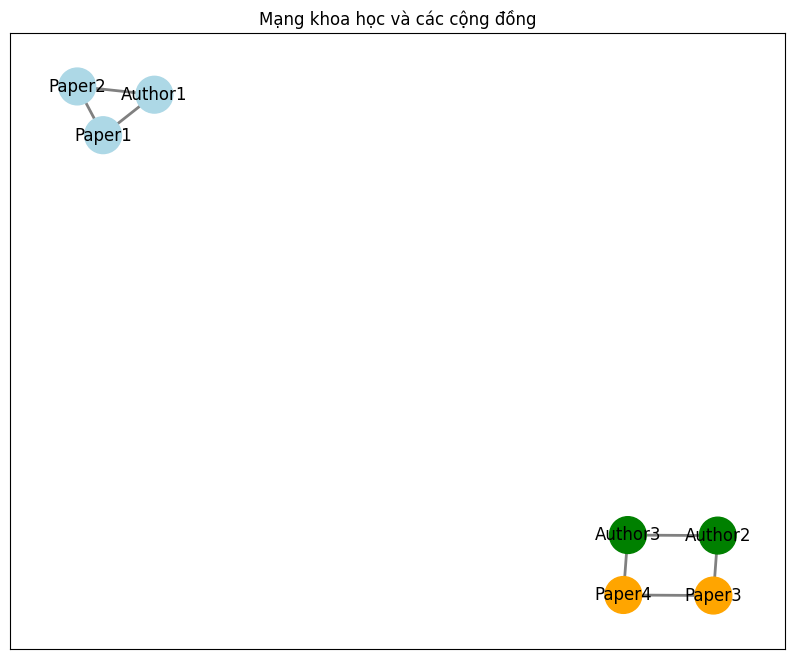

In [3]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

# 1. Tạo mạng khoa học mẫu
science_network = nx.Graph()

# Thêm các bài viết hoặc tác giả làm nút
nodes = ["Paper1", "Paper2", "Paper3", "Paper4", "Author1", "Author2", "Author3"]
science_network.add_nodes_from(nodes)

# Thêm các mối liên kết (trích dẫn hoặc hợp tác)
edges = [("Paper1", "Paper2"), ("Paper1", "Author1"),
         ("Paper2", "Author1"), ("Paper3", "Author2"),
         ("Paper4", "Author3"), ("Paper3", "Paper4"),
         ("Author2", "Author3")]
science_network.add_edges_from(edges)

# 2. Tính toán mức độ quan trọng (Centrality)
centrality = nx.degree_centrality(science_network)
print("Centrality:")
for node, value in centrality.items():
    print(f"{node}: {value:.2f}")

# 3. Phát hiện cộng đồng (Community Detection)
from networkx.algorithms.community import girvan_newman
communities = next(girvan_newman(science_network))

# 4. Trực quan hóa mạng khoa học
plt.figure(figsize=(10, 8))
pos = nx.spring_layout(science_network)

# Gán màu cho các cộng đồng
community_colors = ["lightblue", "orange", "green", "purple"]
color_map = {node: community_colors[i] for i, community in enumerate(communities) for node in community}

# Vẽ đồ thị
nx.draw_networkx_nodes(science_network, pos, node_color=[color_map[node] for node in science_network.nodes()],
                       node_size=700)
nx.draw_networkx_edges(science_network, pos, width=2, edge_color="gray")
nx.draw_networkx_labels(science_network, pos, font_size=12, font_color="black")

plt.title("Mạng khoa học và các cộng đồng")
plt.show()

